# NETFLIX SHOW RECOMENDER

In [6]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [7]:
print("Shape:", df.shape)

Shape: (8807, 12)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [9]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')



In [12]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [15]:
print(df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [13]:
# Fill nulls in 'country', 'cast', 'director' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)

In [14]:
print(df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [16]:
# Drop rows where 'title' is missing (critical column)
df.dropna(subset=['title'], inplace=True)

In [18]:
print(df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [19]:
# Extract duration (in minutes or seasons)
df['duration_type'] = df['duration'].str.extract(r'(\D+)', expand=False).str.strip()
df['duration_int'] = df['duration'].str.extract(r'(\d+)', expand=False).astype(float)

In [20]:
print(df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [21]:
# Lowercase genre (listed_in) for consistency
df['genres'] = df['listed_in'].str.lower()


In [24]:
print(df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [25]:
# Optional: remove duplicates
df.drop_duplicates(inplace=True)

In [26]:
print(df.info())
print(df[['title', 'type', 'genres', 'duration_int', 'duration_type']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8797 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8803 non-null   object        
 9   duration       8804 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  year_added     8797 non-null   float64       
 13  month_added    8797 non-null   float64       
 14  duration_type  8804 non-null   object        
 15  duration_int   8804 n

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Content Type Distribution (Movie vs TV Show)

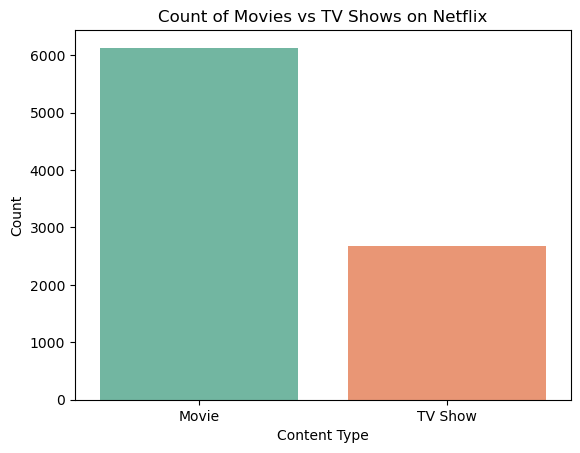

In [28]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

2. Top 10 Countries Producing Netflix Content

In [30]:
top_countries = df['country'].value_counts().head(10)

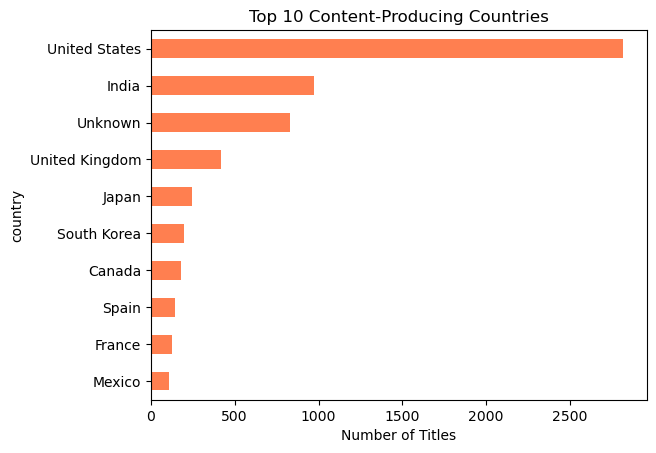

In [31]:
top_countries.plot(kind='barh', color='coral')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

3. Content Released Over the Years

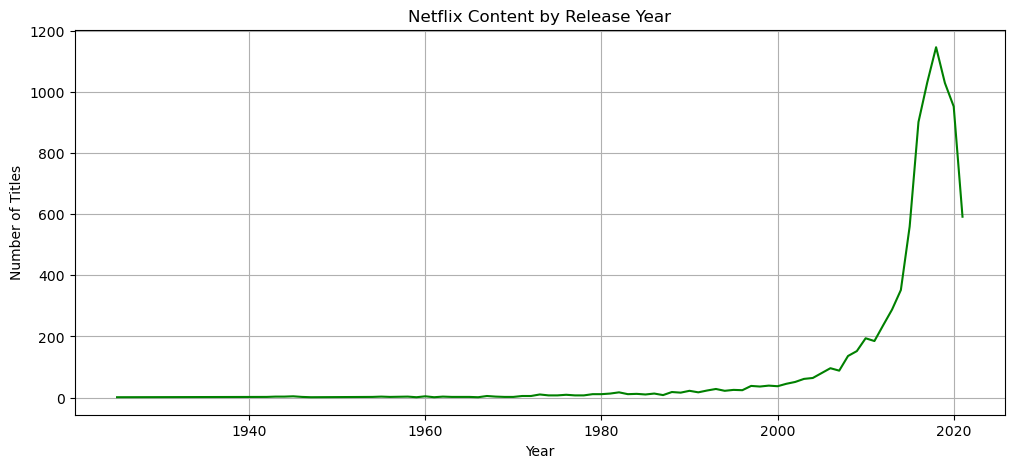

In [32]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,5), color='green')
plt.title('Netflix Content by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


4. Top 10 Most Common Genres

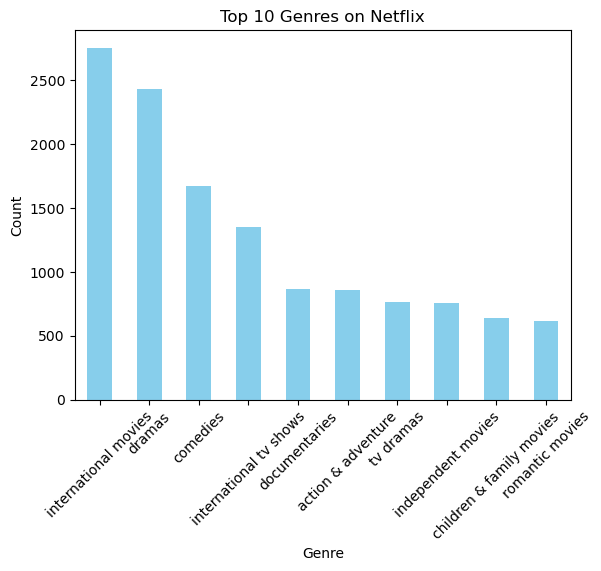

In [33]:
from collections import Counter

# Split genres by comma and flatten the list
genre_list = sum(df['genres'].dropna().str.split(', '), [])
genre_counts = Counter(genre_list)

# Plot top 10 genres
common_genres = pd.Series(dict(genre_counts)).sort_values(ascending=False).head(10)
common_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


RECOMMENDATION 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
# Fill any missing descriptions
df['description'] = df['description'].fillna('')

In [36]:
print(df.head(6))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...        Unknown   

  date_added  release_year rating   duration  \
0 2021-09-25       

In [37]:
# TF-IDF Vectorizer (ignores common stopwords)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

In [39]:
# Compute cosine similarity between all titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [40]:
# Build a title-to-index mapping
title_index = pd.Series(df.index, index=df['title']).drop_duplicates()

# Build a Recommender 

In [43]:
def recommend(title, cosine_sim=cosine_sim):
    idx = title_index.get(title)
    
    if idx is None:
        print("Title not found. Please check spelling or try another one.")
        return []
    
    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score, excluding itself
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]

    # Get recommended title indices
    show_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[show_indices]


In [47]:
recommend("Sherlock")

8658         Under The Skin
6426            Case Closed
7725         Penny Dreadful
6489    City of Tiny Lights
2924           French Toast
Name: title, dtype: object

 # Genre-Based Recommender 

In [48]:
# Fill NaNs
df['genres'] = df['genres'].fillna('')

# TF-IDF on genres (like text)
tfidf_genre = TfidfVectorizer()
tfidf_genre_matrix = tfidf_genre.fit_transform(df['genres'])

# Cosine similarity for genre
cosine_sim_genre = cosine_similarity(tfidf_genre_matrix, tfidf_genre_matrix)


In [49]:
def recommend_by_genre(title, cosine_sim=cosine_sim_genre):
    idx = title_index.get(title)
    if idx is None:
        print("Title not found.")
        return []
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    show_indices = [i[0] for i in sim_scores]
    
    return df['title'].iloc[show_indices]


In [51]:
recommend_by_genre("Sherlock")

1166    The Irregulars
1217           The One
1991      Criminal: UK
2184          Get Even
2530       White Lines
Name: title, dtype: object

# Hybrid Recommender (Combo of description + genre)

In [52]:
# Average of description and genre cosine similarity
hybrid_sim = (cosine_sim + cosine_sim_genre) / 2


In [53]:
def recommend_hybrid(title, cosine_sim=hybrid_sim):
    idx = title_index.get(title)
    if idx is None:
        print("Title not found.")
        return []
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    show_indices = [i[0] for i in sim_scores]
    
    return df['title'].iloc[show_indices]


In [54]:
recommend_hybrid("Sherlock")

3524         Top Boy
2979    THE STRANGER
523         Marcella
1991    Criminal: UK
5716        Paranoid
Name: title, dtype: object

# ******* 